In [1]:
import sys
sys.path.append('/public/src')
from factor_evaluation_server import FactorEvaluation,DataService # type: ignore
import numpy as np
import pandas as pd

In [2]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [3]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

# 定义因子！

In [11]:
@staticmethod
def factor(df):
    '''衡量短期价格波动快慢的过滤器'''
    std_5 = df['close'].rolling(5).std()
    std_30 = df['close'].rolling(30).std()
    price_fluctuation = std_5 / std_30
    return price_fluctuation

# 测试因子表现


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): 0.002665
   Rank_IC (Spearman): 0.000109
📊 信息比率:
   IR: 0.247957
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 130988
   因子列: factor
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


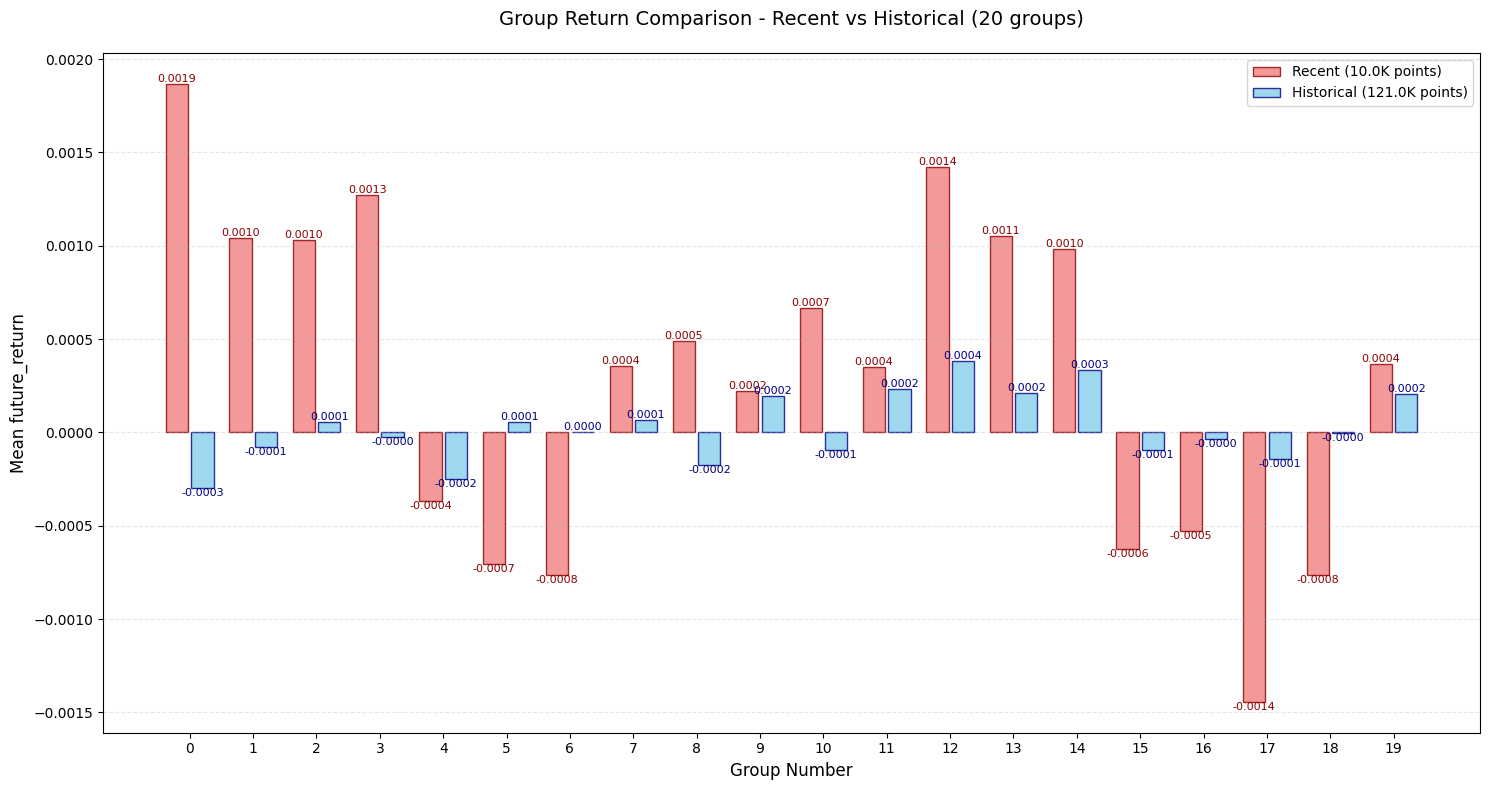

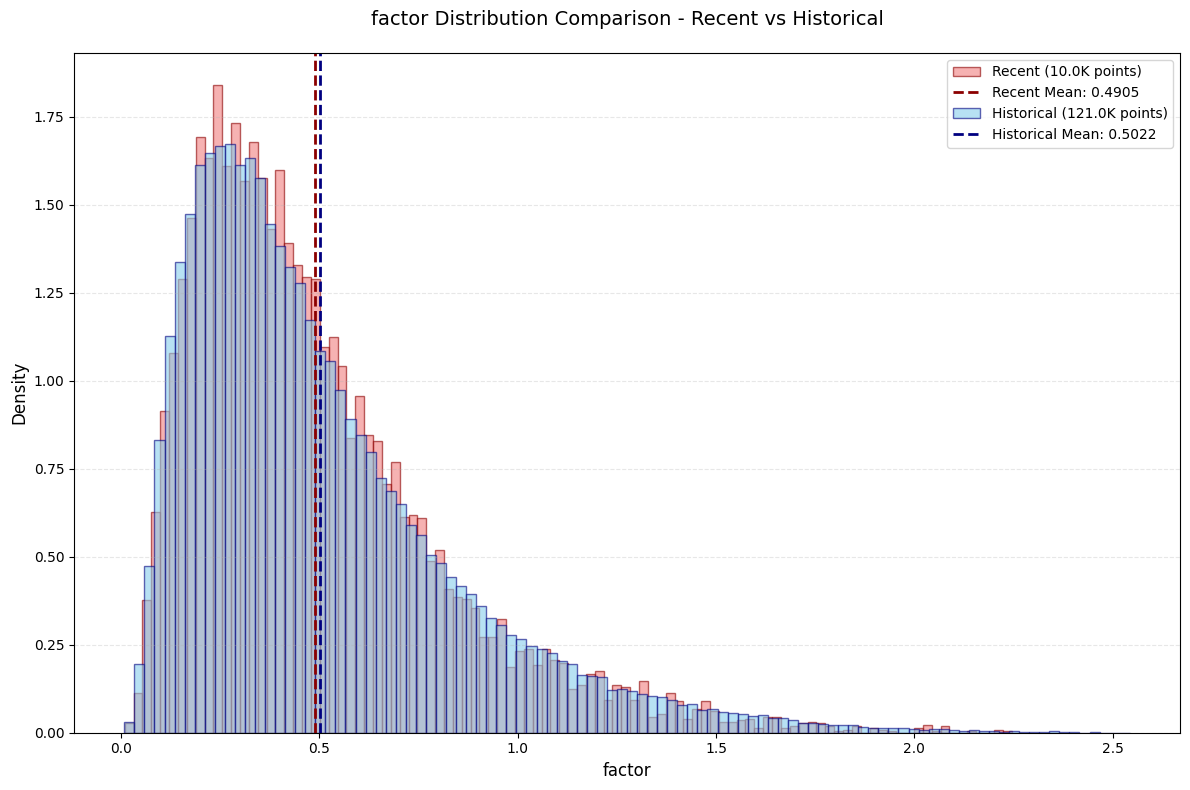

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [12]:
evaluator.set_factor(
    factor_func=factor,
    factor_name='factor'
)

result=evaluator.run_full_evaluation(run_stationarity_test=False)

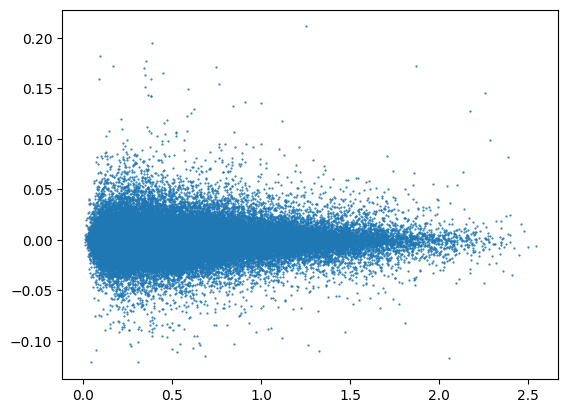

In [13]:
import matplotlib.pyplot as plt
plt.scatter(factor(df),df['close'].pct_change(-10), s=0.3)

In [14]:
result['information_ratio']['group_correlations']
# 这表示不同分组之间的相关性，通常用于评估因子在不同市场状态下的表现一致性。
# 如果相关性较高，说明因子在不同市场状态下表现一致；如果相关性较低，说明因子在不同市场状态下表现差异较大。

[0.009537087837700192,
 0.00026700111884063953,
 0.005954632793781858,
 0.0011948649454589322,
 0.017611355547781194,
 0.014959989556342887,
 -0.008686222342544361,
 -0.021843788086799657,
 -0.0029107117284166246,
 0.012071758139184348]

In [15]:
print(result)

{'correlation_analysis': {'IC': 0.0026652823583170103, 'Rank_IC': 0.00010899550125590393}, 'information_ratio': {'IR': 0.24795723203293255, 'group_correlations': [0.009537087837700192, 0.00026700111884063953, 0.005954632793781858, 0.0011948649454589322, 0.017611355547781194, 0.014959989556342887, -0.008686222342544361, -0.021843788086799657, -0.0029107117284166246, 0.012071758139184348], 'n_groups': 10}, 'group_analysis': {'group_stats':        val_min  val_max  val_mean  return_mean  return_std  count
group                                                            
0       0.0091   0.1212    0.0909      -0.0002      0.0114   6550
1       0.1212   0.1608    0.1420      -0.0000      0.0114   6549
2       0.1608   0.1942    0.1779       0.0002      0.0112   6550
3       0.1942   0.2253    0.2096       0.0000      0.0120   6549
4       0.2253   0.2545    0.2399      -0.0002      0.0117   6549
5       0.2545   0.2845    0.2696       0.0000      0.0112   6550
6       0.2845   0.3156    0.3